### Name - Sagnik Rana
### Collaborators - None
### Title - Othot Data Science Challenge

In [16]:
#Importing libraries
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### Exploring the data

In [17]:
data = pd.read_csv('churn.csv')
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
COLLEGE                        20000 non-null object
INCOME                         20000 non-null int64
OVERAGE                        20000 non-null int64
LEFTOVER                       20000 non-null int64
HOUSE                          20000 non-null int64
HANDSET_PRICE                  20000 non-null int64
OVER_15MINS_CALLS_PER_MONTH    20000 non-null int64
AVERAGE_CALL_DURATION          20000 non-null int64
REPORTED_SATISFACTION          20000 non-null object
REPORTED_USAGE_LEVEL           20000 non-null object
CONSIDERING_CHANGE_OF_PLAN     20000 non-null object
LEAVE                          20000 non-null object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


### Data Overview

In [19]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  20000
Columns  :  12

Features : 
 ['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE']

Missing values :   0

Unique values :  
 COLLEGE                            2
INCOME                         18541
OVERAGE                          284
LEFTOVER                          86
HOUSE                          19703
HANDSET_PRICE                    770
OVER_15MINS_CALLS_PER_MONTH       25
AVERAGE_CALL_DURATION             13
REPORTED_SATISFACTION              5
REPORTED_USAGE_LEVEL               5
CONSIDERING_CHANGE_OF_PLAN         5
LEAVE                              2
dtype: int64


The above values show that the quality of data is good. There are no missing variables, a different number of incomes and categorical variables are well addressed in this dataset.

### Data Manipuation

In [20]:
#Tenure to categorical column
def average_call_duration_lab(data) :
    
    if data["AVERAGE_CALL_DURATION"] <=  4:
        return "Call Duration_0-4"
    elif (data["AVERAGE_CALL_DURATION"] > 4) & (data["AVERAGE_CALL_DURATION"] <= 7 ):
        return "Call Duration_4-7"
    elif (data["AVERAGE_CALL_DURATION"] > 7) & (data["AVERAGE_CALL_DURATION"] <= 10) :
        return "Call Duration_7-10"
    elif (data["AVERAGE_CALL_DURATION"] > 10) & (data["AVERAGE_CALL_DURATION"] <= 15) :
        return "Call Duration_10-15"
    
data["avg_call_duration_label"] = data.apply(lambda data:average_call_duration_lab(data),
                                      axis = 1)

#Separating churn and non churn customers
churn     = data[data["LEAVE"] == "LEAVE"]
not_churn = data[data["LEAVE"] == "STAY"]

#Separating catagorical and numerical columns
target_col = ["LEAVE"]
cat_cols   = data.nunique()[churn.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]

#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#labels
lab = data["LEAVE"].value_counts().keys().tolist()
#values
val = data["LEAVE"].value_counts().values.tolist()
# print(churn["LEAVE"].value_counts())
trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data1 = [trace]
fig = go.Figure(data = data1,layout = layout)
py.iplot(fig)

The classes in the dataset is very much balanced. This is a good news. We can rely on AUC score when we will build up our models. 

### Exploratory Data Analysis

In [21]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    '''
    This function plots the different pie graphs
    '''
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data1 = [trace1,trace2]
    fig  = go.Figure(data = data1,layout = layout)
    py.iplot(fig)

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

In all the donut graphs, we can see that the distribution is very symmetric. Considering the data generation process which consist of selection of random customers and letting them enjoy the service and then letting them decide whether they want to leave or not, this kind of symmetry is very ususual. My point is, this data is artificial or made up.

We will try to plot further continuos variable graphs to understand whether we can support this hypothesis or not.

In [22]:
column = 'INCOME'
trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
trace2 = go.Histogram(x  = not_churn[column],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .9
                     )

data_1 = [trace1,trace2]
layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column,
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "percent",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                       )
                  )
fig  = go.Figure(data=data_1,layout=layout)

py.iplot(fig)

This graph shows that below 90K income, there are more non-churners than churners, and after 90K, the population consists more of churning customers. It's surprising we have such division in customers. There should be something which is influencing this kind of trend.

In [23]:
column = 'OVERAGE'
trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
trace2 = go.Histogram(x  = not_churn[column],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .9
                     )

data_1 = [trace1,trace2]
layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column,
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "percent",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                       )
                  )
fig  = go.Figure(data=data_1,layout=layout)

py.iplot(fig)

The overage distribution is quite surprising, as the graphs are very symmetric. There must be something wrong in the data generation process as such kind of symmetry is very unusual. Either all the customers are same in groups or the company is regulating the customers which they are already aware of.

In [24]:
column = 'LEFTOVER'
trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
trace2 = go.Histogram(x  = not_churn[column],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .9
                     )

data_1 = [trace1,trace2]
layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column,
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "percent",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                       )
                  )
fig  = go.Figure(data=data_1,layout=layout)

py.iplot(fig)

Same story.The leftover is also symmetric as the number increases in the x axis. I can say with confidence now, that this part of the dataset is artificial.

If the data comes from the randomized trail, and there is no influencing effect on the outcome of customer's action, this kind of symmetric distribution is highly unlikely.

Moreover, this dataset is highly skewed and missing up a lot of datapoints which can make this in accord with the data generation process.

In [25]:
column = 'HOUSE'
trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
trace2 = go.Histogram(x  = not_churn[column],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .9
                     )

data_1 = [trace1,trace2]
layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column,
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "percent",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                       )
                  )
fig  = go.Figure(data=data_1,layout=layout)

py.iplot(fig)

The distribution shows that before the 0.6M mark, the churning customers have higher house evaluation and after the 0.6M mark, the non-churning customers have the higher house evaluation. This is not in sync with the income graphs, as the income graph mentioned that the churning customers has higher income. 

The house distribution here consist the value of churning and non-churning customers in the same ratio. This also seems to be artificial. The sudden drop after 0.3M and then the shift in distribution after the 0.6M mark, seems to be not alright.

In [26]:
column = 'HANDSET_PRICE'
trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
trace2 = go.Histogram(x  = not_churn[column],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .9
                     )

data_1 = [trace1,trace2]
layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column,
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "percent",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                       )
                  )
fig  = go.Figure(data=data_1,layout=layout)

py.iplot(fig)

The handset price distribution shows that after the 400 dollar mark, there is a sharp fall and there is very clear boundary between the churners and non-churners. This data is not reliable as majority of the people in USA use iPhone which costs over $600 (according to statista.com)

In [27]:
column = 'OVER_15MINS_CALLS_PER_MONTH'
trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
trace2 = go.Histogram(x  = not_churn[column],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .9
                     )

data_1 = [trace1,trace2]
layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column,
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "percent",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                       )
                  )
fig  = go.Figure(data=data_1,layout=layout)

py.iplot(fig)

In this distribution for over 15 minute calls per month, we can see that all the data points are very much symmetric. Considering the data generation process which I discussed above, this is highly unlikely  and it suggests that the customers which are making long calls tend to leave. This might be a result of planning of the call rates by the telecom company.

In [28]:
column = 'AVERAGE_CALL_DURATION'
trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
trace2 = go.Histogram(x  = not_churn[column],
                      histnorm = "percent",
                      name = "Non churn customers",
                      marker = dict(line = dict(width = .5,
                                          color = "black"
                                         )
                             ),
                      opacity = .9
                     )

data_1 = [trace1,trace2]
layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = column+" in minutes ",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "percent",
                                         zerolinewidth=1,
                                         ticklen=5,
                                         gridwidth=2
                                        ),
                       )
                  )
fig  = go.Figure(data=data_1,layout=layout)

py.iplot(fig)

In this distribution for average call duration, we can see that all the data are very much symmetric. The people who have a high average call duration tend to leave more than the people who have not churned.

The above graphs present us a fair insight into the data. The main take away is taht, the data is artificial and does not takes the data generation process into account.

### Data Manipulation

In [29]:
data_new = pd.get_dummies(data = data,columns = cat_cols )
data_new['LEAVE'] = data_new['LEAVE'].map({'STAY':0, 'LEAVE':1})

### Correlation Matrix

In [30]:
#Pearson correlation
correlation = data_new.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data1 = [trace]
fig = go.Figure(data=data1,layout=layout)
py.iplot(fig)

In [31]:
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Dropping one column each to avoid dummy variable trap
data_feature = data_new.drop(columns = ['LEAVE','COLLEGE_zero','REPORTED_SATISFACTION_very_unsat',
                                        'REPORTED_USAGE_LEVEL_very_little',
                                        'CONSIDERING_CHANGE_OF_PLAN_perhaps',
                                       'avg_call_duration_label_Call Duration_7-10'])
feature_cols = list(data_feature.columns)

# your new list of features
X = data_new[feature_cols].values
y = data_new['LEAVE'].values
from sklearn import preprocessing

## Min max feature scaling using MinMaxScaler from sklearn
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X = pd.DataFrame(X)

# using variance_inflation_factor to compute VIF scores for the features 

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_dataframe = pd.DataFrame(vif,feature_cols, columns = ['VIF Value'])
vif_dataframe

,VIF Value
INCOME,6.530424
OVERAGE,5.025734
LEFTOVER,3.375971
HOUSE,2.786531
HANDSET_PRICE,5.254042
OVER_15MINS_CALLS_PER_MONTH,4.447859
AVERAGE_CALL_DURATION,16.106776
COLLEGE_one,1.991164
REPORTED_SATISFACTION_avg,1.253042
REPORTED_SATISFACTION_sat,1.127753


After looking at the correlation matrix heatmap and the VIF values, it's safe to remove the AVERAGE_CALL_DURATION as it's inducing high multicolinearity and could be a potential problem for our machine learning models.

In [32]:
feature_cols.remove('AVERAGE_CALL_DURATION')

# your new list of features
X = data_new[feature_cols].values
y = data_new['LEAVE'].values
from sklearn import preprocessing

## Min max feature scaling using MinMaxScaler from sklearn
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X = pd.DataFrame(X)

# using variance_inflation_factor to compute VIF scores for the features 

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_dataframe = pd.DataFrame(vif,feature_cols, columns = ['VIF Value'])
vif_dataframe

,VIF Value
INCOME,6.443134
OVERAGE,5.007538
LEFTOVER,3.250941
HOUSE,2.705347
HANDSET_PRICE,5.251971
OVER_15MINS_CALLS_PER_MONTH,4.443576
COLLEGE_one,1.960303
REPORTED_SATISFACTION_avg,1.243436
REPORTED_SATISFACTION_sat,1.122414
REPORTED_SATISFACTION_unsat,1.473952


The above ones are our final features.

## Model Building

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

X = data_new[feature_cols].values
y = data_new['LEAVE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

import numpy as np
np.random.seed(0)
shuffled_indices = np.random.permutation(len(X))

train_frac = 0.8
train_indices = shuffled_indices[:int(train_frac*len(X_train))]
val_indices = shuffled_indices[int(train_frac*len(X_train)):]



# *************** B A S E L I N E   M O D E L *****************************


# As for binary class evaluation, selecting logistic regression model as baseline model
lr = LogisticRegression(penalty='l1')

lr.fit(X_train,y_train)
predictions   = lr.predict(X_test)
probabilities = lr.predict_proba(X_test)
print ("\n Classification report : \n",classification_report(y_test,predictions))
print ("Accuracy   Score : ",accuracy_score(y_test,predictions))

#roc_auc_score
model_roc_auc = roc_auc_score(y_test,predictions) 
print ("Area under curve : ",model_roc_auc,"\n")
fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])


 Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.66      0.66      2055
           1       0.64      0.63      0.63      1945

   micro avg       0.64      0.64      0.64      4000
   macro avg       0.64      0.64      0.64      4000
weighted avg       0.64      0.64      0.64      4000

Accuracy   Score :  0.64475
Area under curve :  0.6443916962202667 



In all the below models, I will be doing K-Fold cross validation to find the most tuned hyperparameter and will fit it on the entire training data to predict on the test data

In [34]:
# ****************  K  N  N  ***************************************


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

num_folds = 5

k_fold = KFold(n_splits=num_folds, shuffle=True, random_state=0)

hyperparameter_settings = [i for i in range(1,10)]

indices = range(len(X_train))
best_hyperparam_setting_knn = None

best_cross_val_score = -np.inf  # assumes that a higher score is better
counter = 1
for hyperparam_setting in hyperparameter_settings:
    fold_scores = []
    for train_indices, val_indices in k_fold.split(indices):
            classifier = KNeighborsClassifier(n_neighbors=hyperparam_setting)
            classifier.fit(X_train[train_indices], y_train[train_indices])
            predicted_label = classifier.predict(X_train[val_indices])
            fold_scores.append(f1_score(y_train[val_indices], predicted_label, average='weighted'))
            counter = counter + 1
    cross_val_score = np.mean(fold_scores)
    if cross_val_score > best_cross_val_score:  # assumes that a higher score is better
        best_cross_val_score = cross_val_score
        best_hyperparam_setting_knn = hyperparam_setting
        
print("Best Score KNN cross val",str(best_cross_val_score))
print('Best hyperparameter setting:', best_hyperparam_setting_knn)

Best Score KNN cross val 0.5876581666706897
Best hyperparameter setting: 7


In [35]:
#*****************   S V M   *******************************

# from sklearn import svm
# import numpy as np

# Cs = np.logspace(-4, 2, 10) #10 numbers evenly spaced between 10^-4 and 10^(2)
# Gammas = [1.0, 10.0, 100.0, 1000.0]
# parameter_list = [[C,G] for C in Cs for G in Gammas]
# best_cross_val_score = -np.inf
# num_folds = 5

# k_fold = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# c_g_scores = []
# for p in parameter_list:
#     C = p[0]
#     G = p[1]
#     fold_scores = []
#     train = train_indices
#     val = val_indices
#     fold_scores = []
#     for k, (train, val) in enumerate(k_fold.split(X_train, y_train)):
#         clf = svm.SVC(kernel='rbf', gamma=G, C=C)
#         clf.fit(X_train[train], y_train[train])
#         ypred = clf.predict(X_train[val])
#         fold_scores.append(f1_score(y_train[val], ypred, average='weighted'))

#     cross_val_score = np.mean(fold_scores)
#     if cross_val_score > best_cross_val_score:  # assumes that a higher score is better
#         best_cross_val_score = cross_val_score
#         C = str(C)
#         G = str(G)

# print("Best Score SVM cross val",str(best_cross_val_score))
# print("C = " + str(C) + " , Gamma = " + str(G))

In [36]:
# *************  R A N D O M   F O R E S T   *******************************

from sklearn.ensemble import RandomForestClassifier
best_cross_val_score = -np.inf
best_hyperparameter_setting = None

hyperparameter_settings = [(num_trees, max_depth)
                           for num_trees in [50, 100, 150, 200, 250, 300]
                           for max_depth in [3, 4, 5, 7, 8, None]]


kf = KFold(n_splits=5, shuffle=True, random_state=0)


for hyperparam_setting in hyperparameter_settings:
    num_trees, max_depth = hyperparam_setting
    fold_scores = []
    for train_indices, val_indices in kf.split(indices):
        classifier = RandomForestClassifier(n_estimators=num_trees,
                                            max_depth=max_depth,
                                            random_state=0)
        classifier.fit(X_train[train_indices], y_train[train_indices])
        predicted_label = classifier.predict(X_train[val_indices])
        fold_scores.append(f1_score(y_train[val_indices], predicted_label, average='weighted'))

    cross_val_score = np.mean(fold_scores)
    if cross_val_score > best_cross_val_score:  # assumes that a higher score is better
        best_cross_val_score = cross_val_score
        best_hyperparam_setting = hyperparam_setting
        
print("Best Score RANDOM FOREST cross val",str(best_cross_val_score))
print('Best hyperparameter setting:', best_hyperparam_setting)
best_tree, best_depth = best_hyperparam_setting

Best Score RANDOM FOREST cross val 0.694562156905679
Best hyperparameter setting: (50, 8)


### Comparision of models

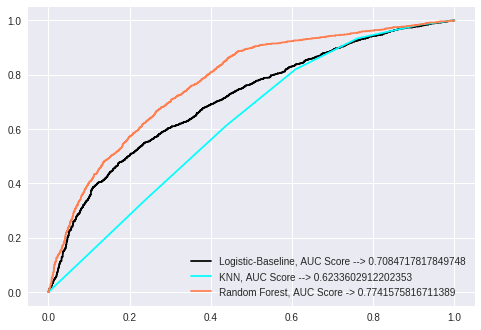

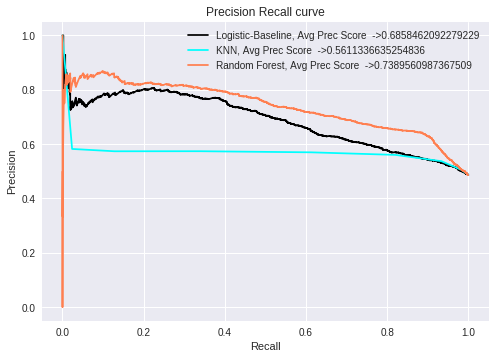

<Figure size 800x700 with 0 Axes>

In [39]:
#your code here
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib.pyplot import figure
from sklearn.metrics import average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

def calculate_precision_recall(y_pred_proba):
    '''
    This function returns the precision and recall values
    '''
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    return (precision, recall)

def calculate_average_precision_score(y_pred_proba):
    '''
    This function returns the average precision score
    '''
    return average_precision_score(y_test, y_pred_proba)



#*************  B A S E L I N E   M O D E L   ****************


plt.style.use('seaborn')

lr_roc = LogisticRegression(penalty = 'l1')
lr_roc.fit(X_train, y_train)
y_pred_proba = lr_roc.predict_proba(X_test)[:,1]

precision_baseline, recall_baseline = calculate_precision_recall(y_pred_proba)
avg_prec_score_baseline = calculate_average_precision_score(y_pred_proba)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
auc_score_baseline = np.trapz(tpr, fpr)

predicted_label = lr_roc.predict(X_test)
f1_baseline = f1_score(y_test, predicted_label, average='weighted')

label = 'Logistic-Baseline, AUC Score --> ' + str(auc_score_baseline)
plt.plot(fpr,tpr, label=label, color = 'black')
plt.legend()



#*************   K N N  **********************


knn_roc = KNeighborsClassifier(n_neighbors= best_hyperparam_setting_knn)
knn_roc.fit(X_train, y_train)
y_pred_proba = knn_roc.predict_proba(X_test)[:,1]
precision_knn, recall_knn = calculate_precision_recall(y_pred_proba)
avg_prec_score_knn = calculate_average_precision_score(y_pred_proba)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba) # for kNN
auc_score_knn = np.trapz(tpr, fpr)

predicted_label = knn_roc.predict(X_test)
f1_knn = f1_score(y_test, predicted_label, average='weighted')

label = 'KNN, AUC Score --> ' + str(auc_score_knn)
plt.plot(fpr,tpr, label=label, color = 'cyan')

plt.legend()



#******************  R A N D O M  F O R E S T  ***********************

from sklearn.ensemble import BaggingClassifier
rf_roc = RandomForestClassifier(n_estimators=best_tree, max_features=best_depth)
rf_roc = BaggingClassifier(base_estimator=rf_roc, n_estimators=100, random_state=0)
rf_roc.fit(X_train, y_train)
y_pred_proba = rf_roc.predict_proba(X_test)[:,1]
precision_rf, recall_rf = calculate_precision_recall(y_pred_proba)
avg_prec_score_rf = calculate_average_precision_score(y_pred_proba)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba) # for kNN
auc_score_rf = np.trapz(tpr, fpr)

predicted_label = rf_roc.predict(X_test)
f1_rf = f1_score(y_test, predicted_label, average='weighted')

label = 'Random Forest, AUC Score -> ' + str(auc_score_rf)
plt.plot(fpr,tpr, label=label, color = 'coral')
plt.legend()
plt.show()

#****************   PLOTTING PRECISION RECALL   **********************


label = 'Logistic-Baseline, Avg Prec Score  ->' + str(avg_prec_score_baseline)
plt.plot(recall_baseline,precision_baseline, label = label, color = 'black')
plt.legend()

label = 'KNN, Avg Prec Score  ->' + str(avg_prec_score_knn)
plt.plot(recall_knn,precision_knn, label = label, color = 'cyan')
plt.legend()

label = 'Random Forest, Avg Prec Score  ->' + str(avg_prec_score_rf)
plt.plot( recall_rf,precision_rf, label = label, color = 'coral')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.legend()
figure(num=None, figsize=(8, 7), dpi=100, facecolor='white', edgecolor='black')
plt.show()

### Interpretation:
AUC provides an aggregate measure of performance across all possible classification thresholds. It shows the probability that the model ranks a random positive example more highly than a random negative example.

Random Forest worked very well with bagging and it really commanded a mixture of numerical and categorical features.

Even the baseline model, the logistic regression has performed very well, as L1 regularization has been applied, which penalizes the weights for not being able to explain the y-variable of the dataset.


Random forest is turning out to be the best model here and it has got the best AUC score of 77%
Also , for the Random forest, the average precision score is 74%

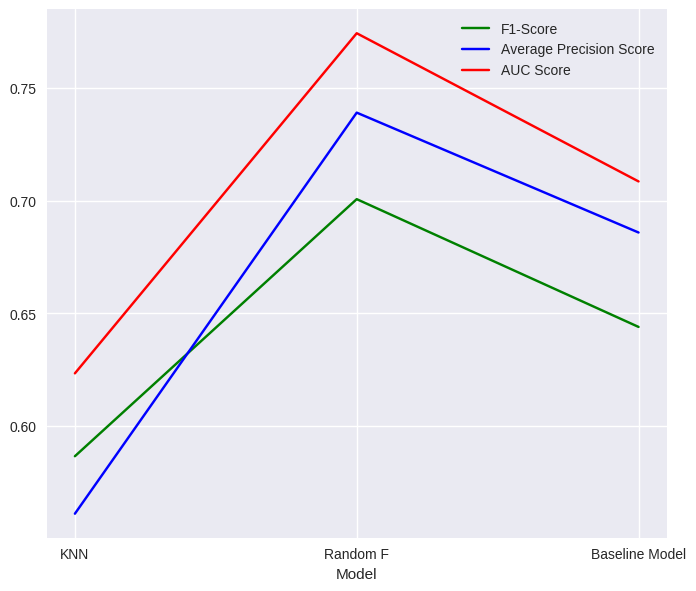

In [38]:
# Comparisions in terms of histogram

plt.style.use('seaborn')
figure(num=None, figsize=(8, 7), dpi=100, facecolor='white', edgecolor='black')
plt.plot(['KNN','Random F', 'Baseline Model'],[f1_knn,f1_rf, f1_baseline], color = 'green',
        label = 'F1-Score')

plt.plot(['KNN','Random F','Baseline Model'],[avg_prec_score_knn,
                                                    avg_prec_score_rf,
                                                    avg_prec_score_baseline],
        label = 'Average Precision Score', color = 'blue')

plt.plot(['KNN','Random F','Baseline Model'],[auc_score_knn,
                                                   auc_score_rf,
                                                   auc_score_baseline],
        label = 'AUC Score', color = 'red')
plt.xlabel('Model')
plt.legend()
plt.show()

By looking at the above graph, we can say that Random Forest is better than the models selected. Logistic regression (baseline model) has performed better than KNN. 

Random forest has outperformed every other model on the basis of F-1 Score, Average Precision Score and AUC Score.

Hence, for this dataset, I would go with Random Forest algorithm.